# One

In [ ]:
module row (
    input wire          clk,
    input wire          resetn,

    // AXI Stream Slave Interface (Input from DMA)
    input wire [7:0]   s_axis_tdata,
    input wire          s_axis_tvalid,
    output wire         s_axis_tready,
    input wire          s_axis_tlast,

    // AXI Stream Master Interface (Output to DMA)
    output wire [7:0]  m_axis_tdata,
    output wire         m_axis_tvalid,
    input wire          m_axis_tready,
    output wire         m_axis_tlast
    );
    
    
    // Pass-through connections
    assign s_axis_tready = m_axis_tready;
    assign m_axis_tdata  = s_axis_tdata>>1;    
    assign m_axis_tvalid = s_axis_tvalid;
    assign m_axis_tlast  = s_axis_tlast;
endmodule


In [15]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt

# Load the overlay that includes the row_parallel_processor module
overlay = Overlay("one.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

Image Height: 512, Width: 384


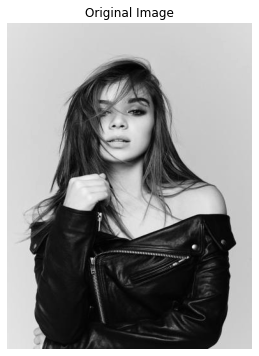

In [22]:
# Reading image
image_path = "hailee_resized2.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
height, width = image.shape
print(f"Image Height: {height}, Width: {width}")

plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


# Preparing to process the image in rows
rows = height
row_size = width  # Each row has 480 pixels
chunk_size = row_size  # Each chunk to process is one row

# Allocating buffers for DMA transfer
input_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 8 bits per pixel
output_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 8 bits per pixel

# Initialize output image
processed_image = np.zeros((height, row_size), dtype=np.uint8)  # Grayscale image

In [23]:

# Process each row
for i in range(rows):
    print(f"Processing row: {i}")
    # Copy the row data into input buffer
    np.copyto(input_buffer, image[i, :])  # Copy one row

    # Start DMA transfer
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)

    # Wait for the transfer to complete
    dma.sendchannel.wait()
    dma.recvchannel.wait()

    # Copy processed row back to output image
    processed_image[i, :] = output_buffer


Processing row: 0
Processing row: 1
Processing row: 2
Processing row: 3
Processing row: 4
Processing row: 5
Processing row: 6
Processing row: 7
Processing row: 8
Processing row: 9
Processing row: 10
Processing row: 11
Processing row: 12
Processing row: 13
Processing row: 14
Processing row: 15
Processing row: 16
Processing row: 17
Processing row: 18
Processing row: 19
Processing row: 20
Processing row: 21
Processing row: 22
Processing row: 23
Processing row: 24
Processing row: 25
Processing row: 26
Processing row: 27
Processing row: 28
Processing row: 29
Processing row: 30
Processing row: 31
Processing row: 32
Processing row: 33
Processing row: 34
Processing row: 35
Processing row: 36
Processing row: 37
Processing row: 38
Processing row: 39
Processing row: 40
Processing row: 41
Processing row: 42
Processing row: 43
Processing row: 44
Processing row: 45
Processing row: 46
Processing row: 47
Processing row: 48
Processing row: 49
Processing row: 50
Processing row: 51
Processing row: 52
Pro

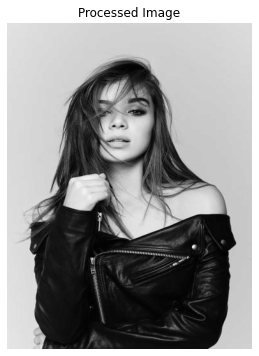

In [24]:
# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()

# one -> color Image

Image Height: 1289, Width: 1980


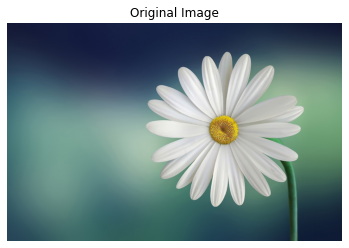

Processing row: 0
Processing row: 1
Processing row: 2
Processing row: 3
Processing row: 4
Processing row: 5
Processing row: 6
Processing row: 7
Processing row: 8
Processing row: 9
Processing row: 10
Processing row: 11
Processing row: 12
Processing row: 13
Processing row: 14
Processing row: 15
Processing row: 16
Processing row: 17
Processing row: 18
Processing row: 19
Processing row: 20
Processing row: 21
Processing row: 22
Processing row: 23
Processing row: 24
Processing row: 25
Processing row: 26
Processing row: 27
Processing row: 28
Processing row: 29
Processing row: 30
Processing row: 31
Processing row: 32
Processing row: 33
Processing row: 34
Processing row: 35
Processing row: 36
Processing row: 37
Processing row: 38
Processing row: 39
Processing row: 40
Processing row: 41
Processing row: 42
Processing row: 43
Processing row: 44
Processing row: 45
Processing row: 46
Processing row: 47
Processing row: 48
Processing row: 49
Processing row: 50
Processing row: 51
Processing row: 52
Pro

Processing row: 478
Processing row: 479
Processing row: 480
Processing row: 481
Processing row: 482
Processing row: 483
Processing row: 484
Processing row: 485
Processing row: 486
Processing row: 487
Processing row: 488
Processing row: 489
Processing row: 490
Processing row: 491
Processing row: 492
Processing row: 493
Processing row: 494
Processing row: 495
Processing row: 496
Processing row: 497
Processing row: 498
Processing row: 499
Processing row: 500
Processing row: 501
Processing row: 502
Processing row: 503
Processing row: 504
Processing row: 505
Processing row: 506
Processing row: 507
Processing row: 508
Processing row: 509
Processing row: 510
Processing row: 511
Processing row: 512
Processing row: 513
Processing row: 514
Processing row: 515
Processing row: 516
Processing row: 517
Processing row: 518
Processing row: 519
Processing row: 520
Processing row: 521
Processing row: 522
Processing row: 523
Processing row: 524
Processing row: 525
Processing row: 526
Processing row: 527


Processing row: 945
Processing row: 946
Processing row: 947
Processing row: 948
Processing row: 949
Processing row: 950
Processing row: 951
Processing row: 952
Processing row: 953
Processing row: 954
Processing row: 955
Processing row: 956
Processing row: 957
Processing row: 958
Processing row: 959
Processing row: 960
Processing row: 961
Processing row: 962
Processing row: 963
Processing row: 964
Processing row: 965
Processing row: 966
Processing row: 967
Processing row: 968
Processing row: 969
Processing row: 970
Processing row: 971
Processing row: 972
Processing row: 973
Processing row: 974
Processing row: 975
Processing row: 976
Processing row: 977
Processing row: 978
Processing row: 979
Processing row: 980
Processing row: 981
Processing row: 982
Processing row: 983
Processing row: 984
Processing row: 985
Processing row: 986
Processing row: 987
Processing row: 988
Processing row: 989
Processing row: 990
Processing row: 991
Processing row: 992
Processing row: 993
Processing row: 994


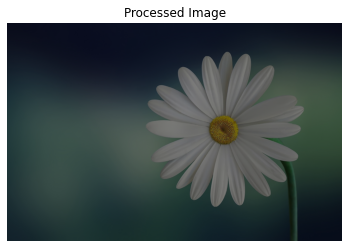

In [1]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt
import time

# Load the overlay that includes the row_parallel_processor module
overlay = Overlay("one.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

# Reading image
image_path = "report.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read as color
height, width, _ = image.shape  # Get dimensions including the color channels
print(f"Image Height: {height}, Width: {width}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()


# Preparing to process the image in rows
rows = height
row_size = width  # Each row has 'width' pixels
chunk_size = row_size * 3  # Each chunk to process is one row across all channels

# Allocating buffers for DMA transfer
input_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 8 bits per pixel for each channel
output_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 8 bits per pixel for each channel

# Initialize output image
processed_image = np.zeros((height, row_size, 3), dtype=np.uint8)  # Color image with 3 channels

# Start timing
start_time = time.time()

# Process each row
for i in range(rows):
    print(f"Processing row: {i}")
    
    # Copy the row data into input buffer
    np.copyto(input_buffer, image[i, :, :].flatten())  # Copy one row with all color channels

    # Start DMA transfer
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)

    # Wait for the transfer to complete
    dma.sendchannel.wait()
    dma.recvchannel.wait()

    # Copy processed row back to output image
    processed_image[i, :, :] = output_buffer.reshape((1, row_size, 3))  # Reshape back to (1, row_size, 3)

# End timing
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Processing time: {elapsed_time:.2f} seconds")

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()


3072 2048 3
0
256
512
768
1024
1280
1536
1792
2048
2304
2560
2816
Processing Time: 0.51 seconds


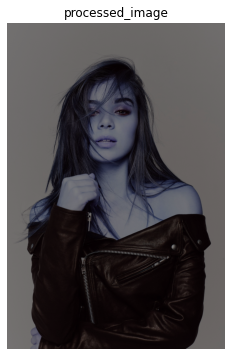

In [65]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt
# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("one.bit")
dma = overlay.axi_dma_0

# reading image
image_path = "hailee_resized3.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# preparing chunks
rows_per_chunk = 256  # size of the chunk
chunk_size = rows_per_chunk*width*channel

# allocating buffer
input_buffer = allocate(shape=(chunk_size), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size), dtype=np.int8)

# initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)
start_time = time.time()
for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk
    
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")
# save image in local machine
cv2.imwrite("uav.png",processed_image)
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

# Two 8 pixels (8*8 = 64)

In [25]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt

# Load the overlay that includes the row_parallel_processor module
overlay = Overlay("two.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

In [31]:
# Reading image
image_path = "hailee_resized2.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
height, width = image.shape
print(f"Image Height: {height}, Width: {width}")

Image Height: 512, Width: 384


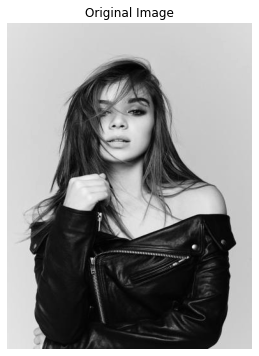

In [33]:
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Parameters for processing
rows = height
pixels_per_chunk = 8  # Number of pixels processed at once (8 pixels)
chunks_per_row = width // pixels_per_chunk  # Number of 8-pixel chunks per row
chunk_size = pixels_per_chunk  # Number of pixels per chunk

In [34]:
input_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 8 pixels per chunk
output_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 8 pixels per chunk

In [35]:
processed_image = np.zeros((height, width), dtype=np.uint8)  # Grayscale image


In [36]:
start_time = time.time()

for row_index in range(rows):
    print(f"Processing row: {row_index}")
    # Process each chunk in the row
    for chunk_index in range(chunks_per_row):
        # Copy chunk data into input buffer
        start_index = chunk_index * pixels_per_chunk
        end_index = start_index + pixels_per_chunk
        np.copyto(input_buffer, image[row_index, start_index:end_index])

        # Start DMA transfer for this chunk
        dma.sendchannel.transfer(input_buffer)
        dma.recvchannel.transfer(output_buffer)

        # Wait for the transfer to complete
        dma.sendchannel.wait()
        dma.recvchannel.wait()

        # Copy processed chunk back to the processed image
        processed_image[row_index, start_index:end_index] = output_buffer
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")

Processing row: 0
Processing row: 1
Processing row: 2
Processing row: 3
Processing row: 4
Processing row: 5
Processing row: 6
Processing row: 7
Processing row: 8
Processing row: 9
Processing row: 10
Processing row: 11
Processing row: 12
Processing row: 13
Processing row: 14
Processing row: 15
Processing row: 16
Processing row: 17
Processing row: 18
Processing row: 19
Processing row: 20
Processing row: 21
Processing row: 22
Processing row: 23
Processing row: 24
Processing row: 25
Processing row: 26
Processing row: 27
Processing row: 28
Processing row: 29
Processing row: 30
Processing row: 31
Processing row: 32
Processing row: 33
Processing row: 34
Processing row: 35
Processing row: 36
Processing row: 37
Processing row: 38
Processing row: 39
Processing row: 40
Processing row: 41
Processing row: 42
Processing row: 43
Processing row: 44
Processing row: 45
Processing row: 46
Processing row: 47
Processing row: 48
Processing row: 49
Processing row: 50
Processing row: 51
Processing row: 52
Pro

Processing row: 420
Processing row: 421
Processing row: 422
Processing row: 423
Processing row: 424
Processing row: 425
Processing row: 426
Processing row: 427
Processing row: 428
Processing row: 429
Processing row: 430
Processing row: 431
Processing row: 432
Processing row: 433
Processing row: 434
Processing row: 435
Processing row: 436
Processing row: 437
Processing row: 438
Processing row: 439
Processing row: 440
Processing row: 441
Processing row: 442
Processing row: 443
Processing row: 444
Processing row: 445
Processing row: 446
Processing row: 447
Processing row: 448
Processing row: 449
Processing row: 450
Processing row: 451
Processing row: 452
Processing row: 453
Processing row: 454
Processing row: 455
Processing row: 456
Processing row: 457
Processing row: 458
Processing row: 459
Processing row: 460
Processing row: 461
Processing row: 462
Processing row: 463
Processing row: 464
Processing row: 465
Processing row: 466
Processing row: 467
Processing row: 468
Processing row: 469


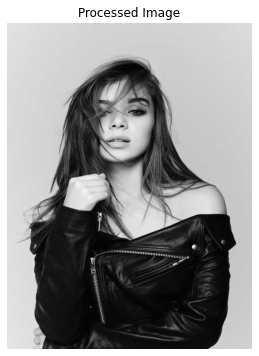

In [25]:
# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

# two -> color image


In [52]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt
import time  # Importing the time module

# Load the overlay that includes the row_parallel_processor module
overlay = Overlay("two.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

Image Height: 640, Width: 480, Channels: 3


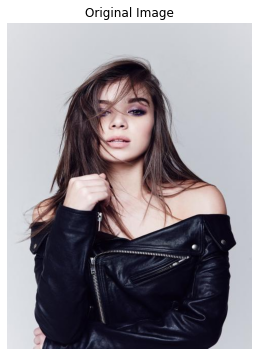

In [53]:
# Reading color image (3 channels: RGB)
image_path = "hailee_resized.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read as color (BGR)
height, width, channels = image.shape
print(f"Image Height: {height}, Width: {width}, Channels: {channels}")

# Convert from BGR to RGB for display and processing
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()

# Check if image width is compatible (480 pixels)
if width != 480:
    raise ValueError("Image width must be 480 pixels.")

In [54]:
# Parameters for processing
rows = height
pixels_per_chunk = 8  # Number of pixels processed at once (8 pixels)
chunks_per_row = width // pixels_per_chunk  # Number of 8-pixel chunks per row
chunk_size = pixels_per_chunk * channels  # 8 pixels * 3 channels = 24 bytes per chunk

# Allocating buffers for DMA transfer (each buffer holds one chunk for one channel)
input_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 8 pixels per chunk, 3 channels
output_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 8 pixels per chunk, 3 channels

# Initialize output image with the same dimensions and type
processed_image = np.zeros((height, width, channels), dtype=np.uint8)

In [55]:
# Process each row
start_time = time.time()
for row_index in range(rows):
    print(f"Processing row: {row_index}")
    # Process each chunk in the row
    for chunk_index in range(chunks_per_row):
        # Copy chunk data into input buffer
        start_index = chunk_index * pixels_per_chunk
        end_index = start_index + pixels_per_chunk

        # Copy each channel separately into the input buffer
        for channel in range(channels):
            np.copyto(input_buffer[channel::channels], image[row_index, start_index:end_index, channel])

        # Start DMA transfer for this chunk
        dma.sendchannel.transfer(input_buffer)
        dma.recvchannel.transfer(output_buffer)

        # Wait for the transfer to complete
        dma.sendchannel.wait()
        dma.recvchannel.wait()

        # Copy processed chunk back to the processed image
        for channel in range(channels):
            processed_image[row_index, start_index:end_index, channel] = output_buffer[channel::channels]
# End timing
end_time = time.time()

Processing row: 0
Processing row: 1
Processing row: 2
Processing row: 3
Processing row: 4
Processing row: 5
Processing row: 6
Processing row: 7
Processing row: 8
Processing row: 9
Processing row: 10
Processing row: 11
Processing row: 12
Processing row: 13
Processing row: 14
Processing row: 15
Processing row: 16
Processing row: 17
Processing row: 18
Processing row: 19
Processing row: 20
Processing row: 21
Processing row: 22
Processing row: 23
Processing row: 24
Processing row: 25
Processing row: 26
Processing row: 27
Processing row: 28
Processing row: 29
Processing row: 30
Processing row: 31
Processing row: 32
Processing row: 33
Processing row: 34
Processing row: 35
Processing row: 36
Processing row: 37
Processing row: 38
Processing row: 39
Processing row: 40
Processing row: 41
Processing row: 42
Processing row: 43
Processing row: 44
Processing row: 45
Processing row: 46
Processing row: 47
Processing row: 48
Processing row: 49
Processing row: 50
Processing row: 51
Processing row: 52
Pro

Processing row: 416
Processing row: 417
Processing row: 418
Processing row: 419
Processing row: 420
Processing row: 421
Processing row: 422
Processing row: 423
Processing row: 424
Processing row: 425
Processing row: 426
Processing row: 427
Processing row: 428
Processing row: 429
Processing row: 430
Processing row: 431
Processing row: 432
Processing row: 433
Processing row: 434
Processing row: 435
Processing row: 436
Processing row: 437
Processing row: 438
Processing row: 439
Processing row: 440
Processing row: 441
Processing row: 442
Processing row: 443
Processing row: 444
Processing row: 445
Processing row: 446
Processing row: 447
Processing row: 448
Processing row: 449
Processing row: 450
Processing row: 451
Processing row: 452
Processing row: 453
Processing row: 454
Processing row: 455
Processing row: 456
Processing row: 457
Processing row: 458
Processing row: 459
Processing row: 460
Processing row: 461
Processing row: 462
Processing row: 463
Processing row: 464
Processing row: 465


Processing time: 65.39 seconds


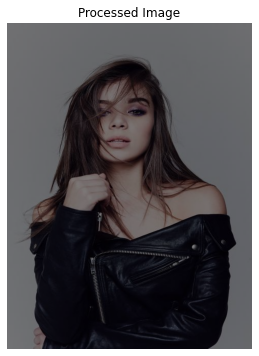

In [56]:
# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Processing time: {elapsed_time:.2f} seconds")

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

In [31]:

module row (
    input wire          clk,
    input wire          resetn,

    // AXI Stream Slave Interface (Input from DMA)
    input wire [63:0]   s_axis_tdata, // 8 pixels at a time (8 * 8 = 64 bits)
    input wire          s_axis_tvalid,
    output reg          s_axis_tready,
    input wire          s_axis_tlast,

    // AXI Stream Master Interface (Output to DMA)
    output reg [63:0]   m_axis_tdata, // 8 pixels at a time (8 * 8 = 64 bits)
    output reg          m_axis_tvalid,
    input wire          m_axis_tready,
    output reg          m_axis_tlast
);

    // Pass-through connections and processing logic
    always @(posedge clk or negedge resetn) begin
        if (!resetn) begin
            s_axis_tready <= 0;
            m_axis_tdata <= 64'd0;
            m_axis_tvalid <= 0;
            m_axis_tlast <= 0;
        end else begin
            // Ready to accept data when not already processing
            if (s_axis_tvalid && s_axis_tready) begin
                // Perform processing: Right-shift each 8-bit pixel
                m_axis_tdata[7:0]   <= s_axis_tdata[7:0]   >> 1; // Pixel 0
                m_axis_tdata[15:8]  <= s_axis_tdata[15:8]  >> 1; // Pixel 1
                m_axis_tdata[23:16] <= s_axis_tdata[23:16] >> 1; // Pixel 2
                m_axis_tdata[31:24] <= s_axis_tdata[31:24] >> 1; // Pixel 3
                m_axis_tdata[39:32] <= s_axis_tdata[39:32] >> 1; // Pixel 4
                m_axis_tdata[47:40] <= s_axis_tdata[47:40] >> 1; // Pixel 5
                m_axis_tdata[55:48] <= s_axis_tdata[55:48] >> 1; // Pixel 6
                m_axis_tdata[63:56] <= s_axis_tdata[63:56] >> 1; // Pixel 7

                // Output valid signal
                m_axis_tvalid <= 1;
                m_axis_tlast <= s_axis_tlast; // Pass through the last signal

                // Deassert ready when data is accepted and m_axis_tready is not asserted
                if (!m_axis_tready) begin
                    s_axis_tready <= 0;
                end
            end else begin
                // Deassert valid signal if master is not ready
                if (m_axis_tready) begin
                    m_axis_tvalid <= 0;
                    s_axis_tready <= 1; // Ready to accept new data
                end
            end
        end
    end
endmodule


SyntaxError: unterminated string literal (detected at line 22) (4167472918.py, line 22)

3120 2082 3
0
8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128
136
144
152
160
168
176
184
192
200
208
216
224
232
240
248
256
264
272
280
288
296
304
312
320
328
336
344
352
360
368
376
384
392
400
408
416
424
432
440
448
456
464
472
480
488
496
504
512
520
528
536
544
552
560
568
576
584
592
600
608
616
624
632
640
648
656
664
672
680
688
696
704
712
720
728
736
744
752
760
768
776
784
792
800
808
816
824
832
840
848
856
864
872
880
888
896
904
912
920
928
936
944
952
960
968
976
984
992
1000
1008
1016
1024
1032
1040
1048
1056
1064
1072
1080
1088
1096
1104
1112
1120
1128
1136
1144
1152
1160
1168
1176
1184
1192
1200
1208
1216
1224
1232
1240
1248
1256
1264
1272
1280
1288
1296
1304
1312
1320
1328
1336
1344
1352
1360
1368
1376
1384
1392
1400
1408
1416
1424
1432
1440
1448
1456
1464
1472
1480
1488
1496
1504
1512
1520
1528
1536
1544
1552
1560
1568
1576
1584
1592
1600
1608
1616
1624
1632
1640
1648
1656
1664
1672
1680
1688
1696
1704
1712
1720
1728
1736
1744
1752
1760
1768
1776
1784
1792
180

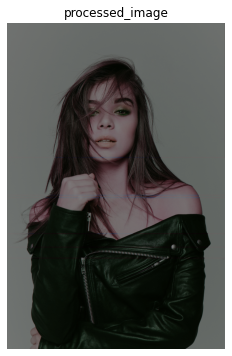

In [37]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt
# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("two.bit")
dma = overlay.axi_dma_0

# reading image
image_path = "hailee.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# preparing chunks
rows_per_chunk = 8  # size of the chunk
chunk_size = rows_per_chunk*width*channel
chunk_size

# allocating buffer
input_buffer = allocate(shape=(chunk_size), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size), dtype=np.int8)

# initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)
start_time = time.time()
for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk
    
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")
# save image in local machine
cv2.imwrite("uav.png",processed_image)
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

Image Dimensions - Height: 3120, Width: 2082, Channels: 3
Processing rows starting at: 0
Processing rows starting at: 8
Processing rows starting at: 16
Processing rows starting at: 24
Processing rows starting at: 32
Processing rows starting at: 40
Processing rows starting at: 48
Processing rows starting at: 56
Processing rows starting at: 64
Processing rows starting at: 72
Processing rows starting at: 80
Processing rows starting at: 88
Processing rows starting at: 96
Processing rows starting at: 104
Processing rows starting at: 112
Processing rows starting at: 120
Processing rows starting at: 128
Processing rows starting at: 136
Processing rows starting at: 144
Processing rows starting at: 152
Processing rows starting at: 160
Processing rows starting at: 168
Processing rows starting at: 176
Processing rows starting at: 184
Processing rows starting at: 192
Processing rows starting at: 200
Processing rows starting at: 208
Processing rows starting at: 216
Processing rows starting at: 224


Processing rows starting at: 2272
Processing rows starting at: 2280
Processing rows starting at: 2288
Processing rows starting at: 2296
Processing rows starting at: 2304
Processing rows starting at: 2312
Processing rows starting at: 2320
Processing rows starting at: 2328
Processing rows starting at: 2336
Processing rows starting at: 2344
Processing rows starting at: 2352
Processing rows starting at: 2360
Processing rows starting at: 2368
Processing rows starting at: 2376
Processing rows starting at: 2384
Processing rows starting at: 2392
Processing rows starting at: 2400
Processing rows starting at: 2408
Processing rows starting at: 2416
Processing rows starting at: 2424
Processing rows starting at: 2432
Processing rows starting at: 2440
Processing rows starting at: 2448
Processing rows starting at: 2456
Processing rows starting at: 2464
Processing rows starting at: 2472
Processing rows starting at: 2480
Processing rows starting at: 2488
Processing rows starting at: 2496
Processing row

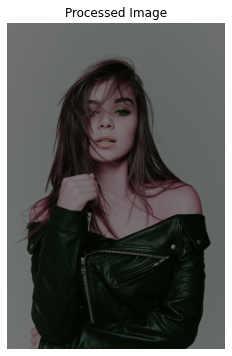

In [47]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("two.bit")
dma = overlay.axi_dma_0

# Reading the image
image_path = "hailee.jpg"  # Path to the image
image = cv2.imread(image_path)
height, width, channel = image.shape
print(f"Image Dimensions - Height: {height}, Width: {width}, Channels: {channel}")

# Parameters for processing
rows_per_chunk = 8  # Process 8 rows at a time
pixels_per_chunk = 8  # Process 8 pixels per chunk
chunk_size = rows_per_chunk * width * channel  # Total size per chunk (rows * width * channels)

# Allocating buffer
input_buffer = allocate(shape=(chunk_size,), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size,), dtype=np.int8)

# Initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)

# Start timing the process
start_time = time.time()

# Processing the image row by row
for row_start in range(0, height, rows_per_chunk):
    print(f"Processing rows starting at: {row_start}")
    row_end = min(row_start + rows_per_chunk, height)  # Ensure we don't go beyond the image height
    
    # Flatten the chunk (8 rows at a time, processing each row's pixels)
    chunk = image[row_start:row_end, :, :].flatten()
    
    # Copy the chunk into the input buffer
    np.copyto(input_buffer, chunk)
    
    # Start DMA transfer
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    # Wait for DMA transfer to complete
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    # Reshape the processed output chunk and copy it to the final image
    processed_chunk = np.reshape(output_buffer, (row_end - row_start, width, channel))
    processed_image[row_start:row_end, :, :] = processed_chunk

# End timing
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Save processed image to the local machine
output_image_path = "processed_image.png"
cv2.imwrite(output_image_path, processed_image)
print(f"Processed image saved to: {output_image_path}")

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

# Free up the allocated buffers
input_buffer.close()
output_buffer.close()


3072 2048 3
0
256
512
768
1024
1280
1536
1792
2048
2304
2560
2816
Processing Time: 0.34 seconds


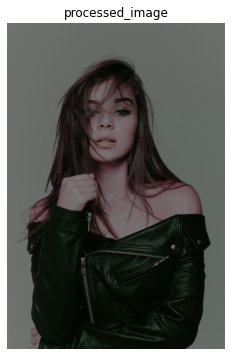

In [63]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt
# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("two.bit")
dma = overlay.axi_dma_0

# reading image
image_path = "hailee_resized3.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# preparing chunks
rows_per_chunk = 256  # size of the chunk
chunk_size = rows_per_chunk*width*channel

# allocating buffer
input_buffer = allocate(shape=(chunk_size), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size), dtype=np.int8)

# initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)
start_time = time.time()
for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk
    
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")
# save image in local machine
cv2.imwrite("uav.png",processed_image)
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

# three -> 128 pixels

In [ ]:
module row (
    input wire          clk,
    input wire          resetn,

    // AXI Stream Slave Interface (Input from DMA)
    input wire [1023:0] s_axis_tdata, // 128 pixels at a time (128 * 8 = 1024 bits)
    input wire          s_axis_tvalid,
    output wire         s_axis_tready,
    input wire          s_axis_tlast,

    // AXI Stream Master Interface (Output to DMA)
    output wire [1023:0] m_axis_tdata, // 128 pixels at a time (128 * 8 = 1024 bits)
    output wire         m_axis_tvalid,
    input wire          m_axis_tready,
    output wire         m_axis_tlast
);
/// Internal signals for processing
    reg [1023:0] processed_data;
    reg valid_reg;
    reg last_reg;

    // Assign output signals
    assign m_axis_tdata  = processed_data;
    assign m_axis_tvalid = valid_reg;
    assign m_axis_tlast  = last_reg;
    assign s_axis_tready = m_axis_tready;  // Ready when master is ready
    integer i; // Declare a loop variable
    // Pixel processing logic: Right shift each 8-bit pixel by 1
    always @(posedge clk or negedge resetn) begin
        if (!resetn) begin
            processed_data <= 1024'd0;
            valid_reg <= 0;
            last_reg <= 0;
        end else begin
            if (s_axis_tvalid && s_axis_tready) begin
                // Right shift each 8-bit pixel in the 1024-bit input
                
                for (i = 0; i < 128; i = i + 1) begin
                    processed_data[(i+1)*8-1 -: 8] <= s_axis_tdata[(i+1)*8-1 -: 8] >> 1; // Shift each pixel
                end

                // Output signals
                valid_reg <= 1;
                last_reg <= s_axis_tlast;
            end else if (m_axis_tready) begin
                // Clear valid and last signals when data is accepted
                valid_reg <= 0;
                last_reg <= 0;
            end
        end
    end
endmodule

Image Height: 640, Width: 480


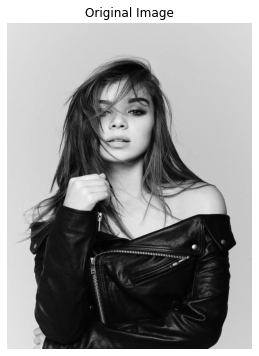

Processing row: 0
Processing row: 1
Processing row: 2
Processing row: 3
Processing row: 4
Processing row: 5
Processing row: 6
Processing row: 7
Processing row: 8
Processing row: 9
Processing row: 10
Processing row: 11
Processing row: 12
Processing row: 13
Processing row: 14
Processing row: 15
Processing row: 16
Processing row: 17
Processing row: 18
Processing row: 19
Processing row: 20
Processing row: 21
Processing row: 22
Processing row: 23
Processing row: 24
Processing row: 25
Processing row: 26
Processing row: 27
Processing row: 28
Processing row: 29
Processing row: 30
Processing row: 31
Processing row: 32
Processing row: 33
Processing row: 34
Processing row: 35
Processing row: 36
Processing row: 37
Processing row: 38
Processing row: 39
Processing row: 40
Processing row: 41
Processing row: 42
Processing row: 43
Processing row: 44
Processing row: 45
Processing row: 46
Processing row: 47
Processing row: 48
Processing row: 49
Processing row: 50
Processing row: 51
Processing row: 52
Pro

Processing row: 430
Processing row: 431
Processing row: 432
Processing row: 433
Processing row: 434
Processing row: 435
Processing row: 436
Processing row: 437
Processing row: 438
Processing row: 439
Processing row: 440
Processing row: 441
Processing row: 442
Processing row: 443
Processing row: 444
Processing row: 445
Processing row: 446
Processing row: 447
Processing row: 448
Processing row: 449
Processing row: 450
Processing row: 451
Processing row: 452
Processing row: 453
Processing row: 454
Processing row: 455
Processing row: 456
Processing row: 457
Processing row: 458
Processing row: 459
Processing row: 460
Processing row: 461
Processing row: 462
Processing row: 463
Processing row: 464
Processing row: 465
Processing row: 466
Processing row: 467
Processing row: 468
Processing row: 469
Processing row: 470
Processing row: 471
Processing row: 472
Processing row: 473
Processing row: 474
Processing row: 475
Processing row: 476
Processing row: 477
Processing row: 478
Processing row: 479


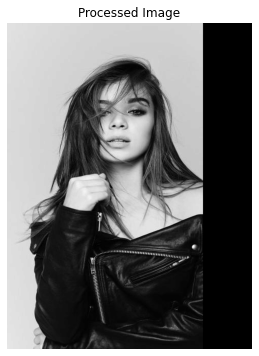

In [74]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt

# Load the overlay that includes the pixel processor module
overlay = Overlay("three.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

# Reading image
image_path = "hailee_resized.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
height, width = image.shape
print(f"Image Height: {height}, Width: {width}")

plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Parameters for processing
rows = height
pixels_per_chunk = 128  # Number of pixels processed at once (128 pixels)
chunks_per_row = width // pixels_per_chunk  # Number of 128-pixel chunks per row
chunk_size = pixels_per_chunk  # Number of pixels per chunk

# Allocating buffers for DMA transfer (each buffer holds one chunk)
input_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 128 pixels per chunk
output_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 128 pixels per chunk

# Initialize output image
processed_image = np.zeros((height, width), dtype=np.uint8)  # Grayscale image

# Process each row
for row_index in range(rows):
    print(f"Processing row: {row_index}")
    # Process each chunk in the row
    for chunk_index in range(chunks_per_row):
        # Copy chunk data into input buffer
        start_index = chunk_index * pixels_per_chunk
        end_index = start_index + pixels_per_chunk
        np.copyto(input_buffer, image[row_index, start_index:end_index])

        # Start DMA transfer for this chunk
        dma.sendchannel.transfer(input_buffer)
        dma.recvchannel.transfer(output_buffer)

        # Wait for the transfer to complete
        dma.sendchannel.wait()
        dma.recvchannel.wait()

        # Copy processed chunk back to the processed image
        processed_image[row_index, start_index:end_index] = output_buffer

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()


In [82]:
cv2.imwrite("sai2.png",processed_image)

True

Image Height: 3120, Width: 2048, Channels: 3
Processing row: 0
Processing row: 1
Processing row: 2
Processing row: 3
Processing row: 4
Processing row: 5
Processing row: 6
Processing row: 7
Processing row: 8
Processing row: 9
Processing row: 10
Processing row: 11
Processing row: 12
Processing row: 13
Processing row: 14
Processing row: 15
Processing row: 16
Processing row: 17
Processing row: 18
Processing row: 19
Processing row: 20
Processing row: 21
Processing row: 22
Processing row: 23
Processing row: 24
Processing row: 25
Processing row: 26
Processing row: 27
Processing row: 28
Processing row: 29
Processing row: 30
Processing row: 31
Processing row: 32
Processing row: 33
Processing row: 34
Processing row: 35
Processing row: 36
Processing row: 37
Processing row: 38
Processing row: 39
Processing row: 40
Processing row: 41
Processing row: 42
Processing row: 43
Processing row: 44
Processing row: 45
Processing row: 46
Processing row: 47
Processing row: 48
Processing row: 49
Processing row:

Processing row: 415
Processing row: 416
Processing row: 417
Processing row: 418
Processing row: 419
Processing row: 420
Processing row: 421
Processing row: 422
Processing row: 423
Processing row: 424
Processing row: 425
Processing row: 426
Processing row: 427
Processing row: 428
Processing row: 429
Processing row: 430
Processing row: 431
Processing row: 432
Processing row: 433
Processing row: 434
Processing row: 435
Processing row: 436
Processing row: 437
Processing row: 438
Processing row: 439
Processing row: 440
Processing row: 441
Processing row: 442
Processing row: 443
Processing row: 444
Processing row: 445
Processing row: 446
Processing row: 447
Processing row: 448
Processing row: 449
Processing row: 450
Processing row: 451
Processing row: 452
Processing row: 453
Processing row: 454
Processing row: 455
Processing row: 456
Processing row: 457
Processing row: 458
Processing row: 459
Processing row: 460
Processing row: 461
Processing row: 462
Processing row: 463
Processing row: 464


Processing row: 831
Processing row: 832
Processing row: 833
Processing row: 834
Processing row: 835
Processing row: 836
Processing row: 837
Processing row: 838
Processing row: 839
Processing row: 840
Processing row: 841
Processing row: 842
Processing row: 843
Processing row: 844
Processing row: 845
Processing row: 846
Processing row: 847
Processing row: 848
Processing row: 849
Processing row: 850
Processing row: 851
Processing row: 852
Processing row: 853
Processing row: 854
Processing row: 855
Processing row: 856
Processing row: 857
Processing row: 858
Processing row: 859
Processing row: 860
Processing row: 861
Processing row: 862
Processing row: 863
Processing row: 864
Processing row: 865
Processing row: 866
Processing row: 867
Processing row: 868
Processing row: 869
Processing row: 870
Processing row: 871
Processing row: 872
Processing row: 873
Processing row: 874
Processing row: 875
Processing row: 876
Processing row: 877
Processing row: 878
Processing row: 879
Processing row: 880


Processing row: 1235
Processing row: 1236
Processing row: 1237
Processing row: 1238
Processing row: 1239
Processing row: 1240
Processing row: 1241
Processing row: 1242
Processing row: 1243
Processing row: 1244
Processing row: 1245
Processing row: 1246
Processing row: 1247
Processing row: 1248
Processing row: 1249
Processing row: 1250
Processing row: 1251
Processing row: 1252
Processing row: 1253
Processing row: 1254
Processing row: 1255
Processing row: 1256
Processing row: 1257
Processing row: 1258
Processing row: 1259
Processing row: 1260
Processing row: 1261
Processing row: 1262
Processing row: 1263
Processing row: 1264
Processing row: 1265
Processing row: 1266
Processing row: 1267
Processing row: 1268
Processing row: 1269
Processing row: 1270
Processing row: 1271
Processing row: 1272
Processing row: 1273
Processing row: 1274
Processing row: 1275
Processing row: 1276
Processing row: 1277
Processing row: 1278
Processing row: 1279
Processing row: 1280
Processing row: 1281
Processing ro

Processing row: 1627
Processing row: 1628
Processing row: 1629
Processing row: 1630
Processing row: 1631
Processing row: 1632
Processing row: 1633
Processing row: 1634
Processing row: 1635
Processing row: 1636
Processing row: 1637
Processing row: 1638
Processing row: 1639
Processing row: 1640
Processing row: 1641
Processing row: 1642
Processing row: 1643
Processing row: 1644
Processing row: 1645
Processing row: 1646
Processing row: 1647
Processing row: 1648
Processing row: 1649
Processing row: 1650
Processing row: 1651
Processing row: 1652
Processing row: 1653
Processing row: 1654
Processing row: 1655
Processing row: 1656
Processing row: 1657
Processing row: 1658
Processing row: 1659
Processing row: 1660
Processing row: 1661
Processing row: 1662
Processing row: 1663
Processing row: 1664
Processing row: 1665
Processing row: 1666
Processing row: 1667
Processing row: 1668
Processing row: 1669
Processing row: 1670
Processing row: 1671
Processing row: 1672
Processing row: 1673
Processing ro

Processing row: 2019
Processing row: 2020
Processing row: 2021
Processing row: 2022
Processing row: 2023
Processing row: 2024
Processing row: 2025
Processing row: 2026
Processing row: 2027
Processing row: 2028
Processing row: 2029
Processing row: 2030
Processing row: 2031
Processing row: 2032
Processing row: 2033
Processing row: 2034
Processing row: 2035
Processing row: 2036
Processing row: 2037
Processing row: 2038
Processing row: 2039
Processing row: 2040
Processing row: 2041
Processing row: 2042
Processing row: 2043
Processing row: 2044
Processing row: 2045
Processing row: 2046
Processing row: 2047
Processing row: 2048
Processing row: 2049
Processing row: 2050
Processing row: 2051
Processing row: 2052
Processing row: 2053
Processing row: 2054
Processing row: 2055
Processing row: 2056
Processing row: 2057
Processing row: 2058
Processing row: 2059
Processing row: 2060
Processing row: 2061
Processing row: 2062
Processing row: 2063
Processing row: 2064
Processing row: 2065
Processing ro

Processing row: 2411
Processing row: 2412
Processing row: 2413
Processing row: 2414
Processing row: 2415
Processing row: 2416
Processing row: 2417
Processing row: 2418
Processing row: 2419
Processing row: 2420
Processing row: 2421
Processing row: 2422
Processing row: 2423
Processing row: 2424
Processing row: 2425
Processing row: 2426
Processing row: 2427
Processing row: 2428
Processing row: 2429
Processing row: 2430
Processing row: 2431
Processing row: 2432
Processing row: 2433
Processing row: 2434
Processing row: 2435
Processing row: 2436
Processing row: 2437
Processing row: 2438
Processing row: 2439
Processing row: 2440
Processing row: 2441
Processing row: 2442
Processing row: 2443
Processing row: 2444
Processing row: 2445
Processing row: 2446
Processing row: 2447
Processing row: 2448
Processing row: 2449
Processing row: 2450
Processing row: 2451
Processing row: 2452
Processing row: 2453
Processing row: 2454
Processing row: 2455
Processing row: 2456
Processing row: 2457
Processing ro

Processing row: 2803
Processing row: 2804
Processing row: 2805
Processing row: 2806
Processing row: 2807
Processing row: 2808
Processing row: 2809
Processing row: 2810
Processing row: 2811
Processing row: 2812
Processing row: 2813
Processing row: 2814
Processing row: 2815
Processing row: 2816
Processing row: 2817
Processing row: 2818
Processing row: 2819
Processing row: 2820
Processing row: 2821
Processing row: 2822
Processing row: 2823
Processing row: 2824
Processing row: 2825
Processing row: 2826
Processing row: 2827
Processing row: 2828
Processing row: 2829
Processing row: 2830
Processing row: 2831
Processing row: 2832
Processing row: 2833
Processing row: 2834
Processing row: 2835
Processing row: 2836
Processing row: 2837
Processing row: 2838
Processing row: 2839
Processing row: 2840
Processing row: 2841
Processing row: 2842
Processing row: 2843
Processing row: 2844
Processing row: 2845
Processing row: 2846
Processing row: 2847
Processing row: 2848
Processing row: 2849
Processing ro

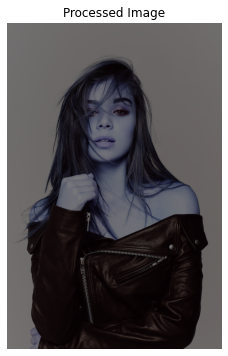

In [14]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt
import time

# Load the overlay that includes the row_parallel_processor module
overlay = Overlay("three.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

# Reading color image (3 channels: RGB)
image_path = "hailee_resized128.jpg"  # Path to your image
image = cv2.imread(image_path)  # Read as color (BGR)
height, width, channels = image.shape
print(f"Image Height: {height}, Width: {width}, Channels: {channels}")

# Convert from BGR to RGB for display and processing
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Parameters for processing
rows = height
pixels_per_chunk = 128  # Number of pixels processed at once (128 pixels)
chunks_per_row = width // pixels_per_chunk  # Number of 128-pixel chunks per row
chunk_size = pixels_per_chunk * channels  # 128 pixels * 3 channels = 384 bytes per chunk

# Allocating buffers for DMA transfer (each buffer holds one chunk for one channel)
input_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 128 pixels per chunk, 3 channels
output_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # 128 pixels per chunk, 3 channels

# Initialize output image with the same dimensions and type
processed_image = np.zeros((height, width, channels), dtype=np.uint8)

# Process each row
start_time = time.time()
for row_index in range(rows):
    print(f"Processing row: {row_index}")
    # Process each chunk in the row
    for chunk_index in range(chunks_per_row):
        # Copy chunk data into input buffer
        start_index = chunk_index * pixels_per_chunk
        end_index = start_index + pixels_per_chunk

        # Copy each channel separately into the input buffer
        for channel in range(channels):
            np.copyto(input_buffer[channel::channels], image[row_index, start_index:end_index, channel])

        # Start DMA transfer for this chunk
        dma.sendchannel.transfer(input_buffer)
        dma.recvchannel.transfer(output_buffer)

        # Wait for the transfer to complete
        dma.sendchannel.wait()
        dma.recvchannel.wait()

        # Copy processed chunk back to the processed image
        for channel in range(channels):
            processed_image[row_index, start_index:end_index, channel] = output_buffer[channel::channels]

# End timing
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

# Free the allocated buffers
input_buffer.close()
output_buffer.close()


In [13]:
cv2.imwrite("sai4.png",processed_image)

True

In [43]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt
# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("three.bit")
dma = overlay.axi_dma_0


In [44]:

# reading image
image_path = "hailee.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# preparing chunks
rows_per_chunk = 8  # size of the chunk
chunk_size = rows_per_chunk*width*channel
chunk_size

# allocating buffer
input_buffer = allocate(shape=(chunk_size), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size), dtype=np.int8)

# initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)


3120 2082 3


In [45]:
start_time = time.time()
for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk
    
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")

0


KeyboardInterrupt: 

In [ ]:
# save image in local machine
cv2.imwrite("uav.png",processed_image)
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

Image Dimensions - Height: 3120, Width: 2082, Channels: 3
Processing rows starting at: 0
Processing rows starting at: 8
Processing rows starting at: 16
Processing rows starting at: 24
Processing rows starting at: 32
Processing rows starting at: 40
Processing rows starting at: 48
Processing rows starting at: 56
Processing rows starting at: 64
Processing rows starting at: 72
Processing rows starting at: 80
Processing rows starting at: 88
Processing rows starting at: 96
Processing rows starting at: 104
Processing rows starting at: 112
Processing rows starting at: 120
Processing rows starting at: 128
Processing rows starting at: 136
Processing rows starting at: 144
Processing rows starting at: 152
Processing rows starting at: 160
Processing rows starting at: 168
Processing rows starting at: 176
Processing rows starting at: 184
Processing rows starting at: 192
Processing rows starting at: 200
Processing rows starting at: 208
Processing rows starting at: 216
Processing rows starting at: 224


Processing rows starting at: 2256
Processing rows starting at: 2264
Processing rows starting at: 2272
Processing rows starting at: 2280
Processing rows starting at: 2288
Processing rows starting at: 2296
Processing rows starting at: 2304
Processing rows starting at: 2312
Processing rows starting at: 2320
Processing rows starting at: 2328
Processing rows starting at: 2336
Processing rows starting at: 2344
Processing rows starting at: 2352
Processing rows starting at: 2360
Processing rows starting at: 2368
Processing rows starting at: 2376
Processing rows starting at: 2384
Processing rows starting at: 2392
Processing rows starting at: 2400
Processing rows starting at: 2408
Processing rows starting at: 2416
Processing rows starting at: 2424
Processing rows starting at: 2432
Processing rows starting at: 2440
Processing rows starting at: 2448
Processing rows starting at: 2456
Processing rows starting at: 2464
Processing rows starting at: 2472
Processing rows starting at: 2480
Processing row

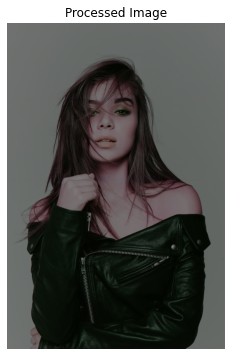

In [48]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("two.bit")
dma = overlay.axi_dma_0

# Reading the image
image_path = "hailee.jpg"  # Path to the image
image = cv2.imread(image_path)
height, width, channel = image.shape
print(f"Image Dimensions - Height: {height}, Width: {width}, Channels: {channel}")

# Parameters for processing
rows_per_chunk = 8  # Process 8 rows at a time
pixels_per_chunk = 124  # Process 8 pixels per chunk
chunk_size = rows_per_chunk * width * channel  # Total size per chunk (rows * width * channels)

# Allocating buffer
input_buffer = allocate(shape=(chunk_size,), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size,), dtype=np.int8)

# Initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)

# Start timing the process
start_time = time.time()

# Processing the image row by row
for row_start in range(0, height, rows_per_chunk):
    print(f"Processing rows starting at: {row_start}")
    row_end = min(row_start + rows_per_chunk, height)  # Ensure we don't go beyond the image height
    
    # Flatten the chunk (8 rows at a time, processing each row's pixels)
    chunk = image[row_start:row_end, :, :].flatten()
    
    # Copy the chunk into the input buffer
    np.copyto(input_buffer, chunk)
    
    # Start DMA transfer
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    # Wait for DMA transfer to complete
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    # Reshape the processed output chunk and copy it to the final image
    processed_chunk = np.reshape(output_buffer, (row_end - row_start, width, channel))
    processed_image[row_start:row_end, :, :] = processed_chunk

# End timing
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Save processed image to the local machine
output_image_path = "processed_image.png"
cv2.imwrite(output_image_path, processed_image)
print(f"Processed image saved to: {output_image_path}")

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

# Free up the allocated buffers
input_buffer.close()
output_buffer.close()


3072 2048 3
0
256
512
768
1024
1280
1536
1792
2048
2304
2560
2816
Processing Time: 0.83 seconds


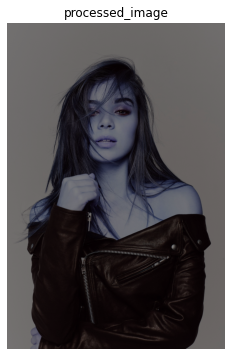

In [68]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt
# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("three.bit")
dma = overlay.axi_dma_0

# reading image
image_path = "hailee_resized2.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# preparing chunks
rows_per_chunk = 128  # size of the chunk
chunk_size = rows_per_chunk*width*channel

# allocating buffer
input_buffer = allocate(shape=(chunk_size), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size), dtype=np.int8)

# initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)
start_time = time.time()
for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk
    
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")
# save image in local machine
cv2.imwrite("uav.png",processed_image)
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

3072 2048 3
0
128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
Processing Time: 0.23 seconds


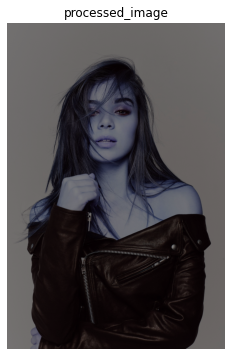

In [72]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("three.bit")
dma = overlay.axi_dma_0

# Reading the image
image_path = "hailee_resized3.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# Preparing chunks
rows_per_chunk = 128  # Size of the chunk
pixels_per_chunk = rows_per_chunk * width  # Total pixels in a chunk
chunk_size = pixels_per_chunk * channel  # Total size of a chunk (in bytes)

# Since we are sending 2 pixels (6 bytes) at a time, adjust the input buffer size accordingly
packed_pixels_per_chunk = pixels_per_chunk // 2  # Two pixels per transfer

# Allocate buffer for 2D data (flattened image, sending 2 pixels (6 bytes) at a time)
input_buffer = allocate(shape=(packed_pixels_per_chunk * 6,), dtype=np.uint8)  # 6 bytes per 2 pixels
output_buffer = allocate(shape=(packed_pixels_per_chunk * 6,), dtype=np.uint8)

# Initialize output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.uint8)

start_time = time.time()

for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i + rows_per_chunk, height)
    
    # Flatten the image chunk (3D to 1D, grouping two pixels at a time)
    chunk = image[start_row:end_row, :, :].reshape(-1)  # Flatten the image chunk
    
    # The chunk needs to be halved in size to match 2 pixels per group (6 bytes per group)
    np.copyto(input_buffer, chunk[:packed_pixels_per_chunk * 6])  # Copy only the required part to input buffer
    
    # DMA transfers
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    # Reshape back the output to the original 3D format after processing
    processed_chunk = output_buffer.reshape(end_row - start_row, width, channel)
    processed_image[start_row:end_row, :, :] = processed_chunk

end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Save image in local machine
cv2.imwrite("uav.png", processed_image)

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()


3072 2048 3
0
128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
Processing Time: 0.25 seconds


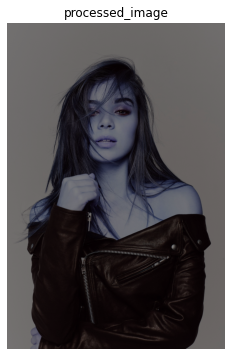

In [76]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("three.bit")
dma = overlay.axi_dma_0

# Reading the image
image_path = "hailee_resized3.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# Preparing chunks
rows_per_chunk = 128  # Size of the chunk
pixels_per_chunk = rows_per_chunk * width  # Total pixels in a chunk
chunk_size = pixels_per_chunk * channel  # Total size of a chunk (in bytes)

# Since we are sending 32 pixels (96 bytes) at a time, adjust the input buffer size accordingly
packed_pixels_per_chunk = pixels_per_chunk // 32  # 32 pixels per transfer (96 bytes)

# Allocate buffer for 2D data (flattened image, sending 32 pixels at a time = 96 bytes)
input_buffer = allocate(shape=(packed_pixels_per_chunk * 96,), dtype=np.uint8)  # 96 bytes per 32 pixels
output_buffer = allocate(shape=(packed_pixels_per_chunk * 96,), dtype=np.uint8)

# Initialize output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.uint8)

start_time = time.time()

for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i + rows_per_chunk, height)
    
    # Flatten the image chunk (3D to 1D, grouping 32 pixels at a time)
    chunk = image[start_row:end_row, :, :].reshape(-1)  # Flatten the image chunk
    
    # The chunk needs to be resized to match 32 pixels per group (96 bytes per group)
    np.copyto(input_buffer, chunk[:packed_pixels_per_chunk * 96])  # Copy the required part to input buffer
    
    # DMA transfers
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    # Reshape back the output to the original 3D format after processing
    processed_chunk = output_buffer.reshape(end_row - start_row, width, channel)
    processed_image[start_row:end_row, :, :] = processed_chunk

end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Save the processed image to local machine
cv2.imwrite("uav.png", processed_image)

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()


3072 2048 3
0
128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
Processing Time: 2.59 seconds


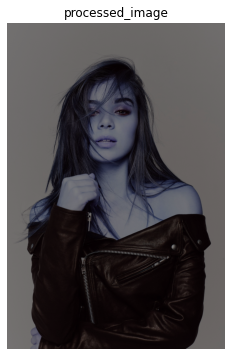

In [80]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("three.bit")
dma = overlay.axi_dma_0

# Reading the image
image_path = "hailee_resized3.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# Preparing chunks
rows_per_chunk = 128  # Size of the chunk
chunk_size = rows_per_chunk * width * channel

# Allocate buffer for 16-bit data (since we're packing two 8-bit pixels into each 16-bit word)
input_buffer = allocate(shape=(chunk_size // 2), dtype=np.int16)
output_buffer = allocate(shape=(chunk_size // 2), dtype=np.int16)

# Initialize output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)

start_time = time.time()

for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i + rows_per_chunk, height)
    
    # Flatten the image chunk and pack two 8-bit pixels into a single 16-bit word
    chunk = image[start_row:end_row, :, :].reshape(-1)
    if len(chunk) % 2 != 0:
        # Handle odd-length case by padding the last pixel
        chunk = np.append(chunk, 0)
    
    chunk_16bit = np.left_shift(chunk[0::2].astype(np.int16), 8) | chunk[1::2].astype(np.int16)
    
    np.copyto(input_buffer, chunk_16bit)
    
    # DMA transfers
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    # After receiving, unpack 16-bit words back into 8-bit pixels
    processed_chunk = output_buffer.reshape(-1)
    processed_chunk_8bit = np.empty((len(processed_chunk) * 2,), dtype=np.int8)
    
    processed_chunk_8bit[0::2] = (processed_chunk >> 8).astype(np.int8)
    processed_chunk_8bit[1::2] = (processed_chunk & 0xFF).astype(np.int8)
    
    processed_chunk_8bit = processed_chunk_8bit[:(end_row - start_row) * width * channel]  # Trim any padding
    
    # Reshape back to 3D format (height, width, channel)
    processed_image[start_row:end_row, :, :] = processed_chunk_8bit.reshape((end_row - start_row, width, channel))

end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Save image in local machine
cv2.imwrite("uav.png", processed_image)

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()
